### Урок 2. Масштабирование признаков. Регуляризация. Стохастический градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

def eval_model(X, y, iterations, alpha=1e-4):
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= (alpha * (1/n * 2 * np.dot((y_pred - y), X.T)))
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
#         if i % (iterations / 10) == 0:
#             print(i, W, err)
    return W

X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

X[1].min(), X[1].max()

X[2].min(), X[2].max()

X_norm = X.copy()
X_norm = X_norm.astype(np.float64)

X_norm[1] = (X[1] - X[1].min()) / (X[1].max() - X[1].min())

X_norm[2] = (X[2] - X[2].min()) / (X[2].max() - X[2].min())

X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()

X_st[1] = (X[1] - X1_mean) / X1_std

X_st[2] = calc_std_fit(X[2])

X_st[3] = calc_std_fit(X[3])

### Практическое задание

## Задание 1 

Постройте график зависимости весов всех признаков от lambda в L2-регуляризации на основе данных из урока.

## Решение 1

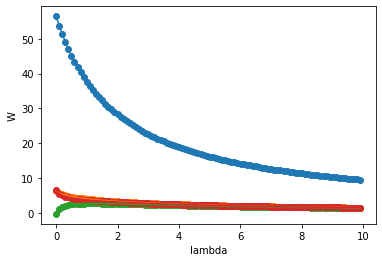

In [2]:
W_arr = []
lambd_arr = []
for i in range(1, 10000, 100):
    lambd = i/1000
    lambd_arr.append(lambd)
    W_arr.append(list(eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambd)))

W_arr_T = list(map(list, zip(*W_arr)))

plt.ylabel('W')
plt.xlabel('lambda')

for w in W_arr_T:
    plt.plot(lambd_arr, w)
    plt.scatter(lambd_arr, w)

## Задание 2

Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

## Решение 2 

Можно. Данные не будут испорчены этим действием. Но смысла в этом нет.

## Ответ 2 

Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

## Решение 3

L1 регуляризация

f(x, W) + (lambda_/2) * np.sum(np.abs(W))

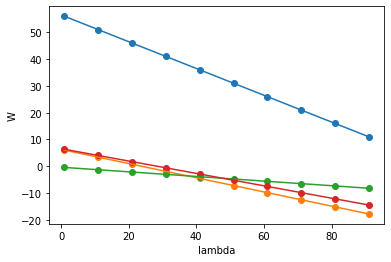

In [5]:
def eval_model_reg1(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_)
    return W

W_arr = []
lambd_arr = []
for i in range(1, 100, 10):
    lambd = i
    lambd_arr.append(lambd)
    W_arr.append(list(eval_model_reg1(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambd)))

W_arr_T = list(map(list, zip(*W_arr)))

plt.ylabel('W')
plt.xlabel('lambda')

for w in W_arr_T:
    plt.plot(lambd_arr, w)
    plt.scatter(lambd_arr, w)